In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from math import sin, cos, sqrt, atan2
df = pd.read_csv("../../api/bird_unofficial_api/csv_output.csv")

In [2]:
# Preprocessing and adding date columns
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
df['datetime'] = df['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))
df['date_string'] = df['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['week_day'] = df['datetime'].apply(lambda x: days[x.weekday()])
df['coordinates']= pd.Series(list(zip(df.latitude, df.longitude)))

In [3]:
df.head()

,id,latitude,longitude,battery_level,captive,time_stamp,datetime,date_string,week_day,coordinates
0,c00d9fed-b2e1-4c03-b5af-e8df59b54c0b,34.413227,-119.855308,94,False,1549735204,2019-02-09 10:00:04,2019-02-09,sat,"(34.41322666666667, -119.85530833333333)"
1,752784ec-3837-4fcb-a80a-2eab5f39c9d1,34.413103,-119.854780,100,False,1549735204,2019-02-09 10:00:04,2019-02-09,sat,"(34.413103, -119.85478)"
2,753208e4-3352-44ff-81f8-c8d69774ad21,34.413105,-119.854775,94,False,1549735204,2019-02-09 10:00:04,2019-02-09,sat,"(34.413105, -119.854775)"
3,8912e8a7-c7a5-4460-8555-a3dd57fa4ce0,34.413105,-119.854775,98,False,1549735204,2019-02-09 10:00:04,2019-02-09,sat,"(34.413105, -119.854775)"
4,f9448498-0a3c-4ef1-bbd4-018ab593b783,34.413078,-119.854760,95,False,1549735204,2019-02-09 10:00:04,2019-02-09,sat,"(34.41307833333334, -119.85475999999998)"


In [4]:
df['date_string'].unique()

array(['2019-02-09', '2019-01-28', '2019-02-07', '2019-02-06',
       '2019-02-01', '2019-02-03', '2019-01-24', '2019-02-04',
       '2019-02-08', '2019-01-30', '2019-01-26', '2019-02-05',
       '2019-01-25', '2019-01-27', '2019-01-29', '2019-02-02',
       '2019-01-31'], dtype=object)

In [5]:
# Euclidean distance calculation (only roughly accurate for 10 min interval polling)
# start and end are tuples of (lat, long)
def distance(start, end):
    R = 6373.0
    dlon = end[1] - start[1]
    dlat = end[0] - start[0]
    a = (sin(dlat/2))**2 + cos(start[0]) * cos(end[0]) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance*1000 #km -> meters

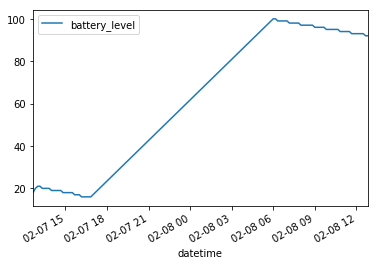

In [8]:
unique_ids = pd.Series(df['id'].values).unique().tolist()
id_df = df[df['id'] == unique_ids[200]]
id_df.plot(x='datetime', y='battery_level')


102


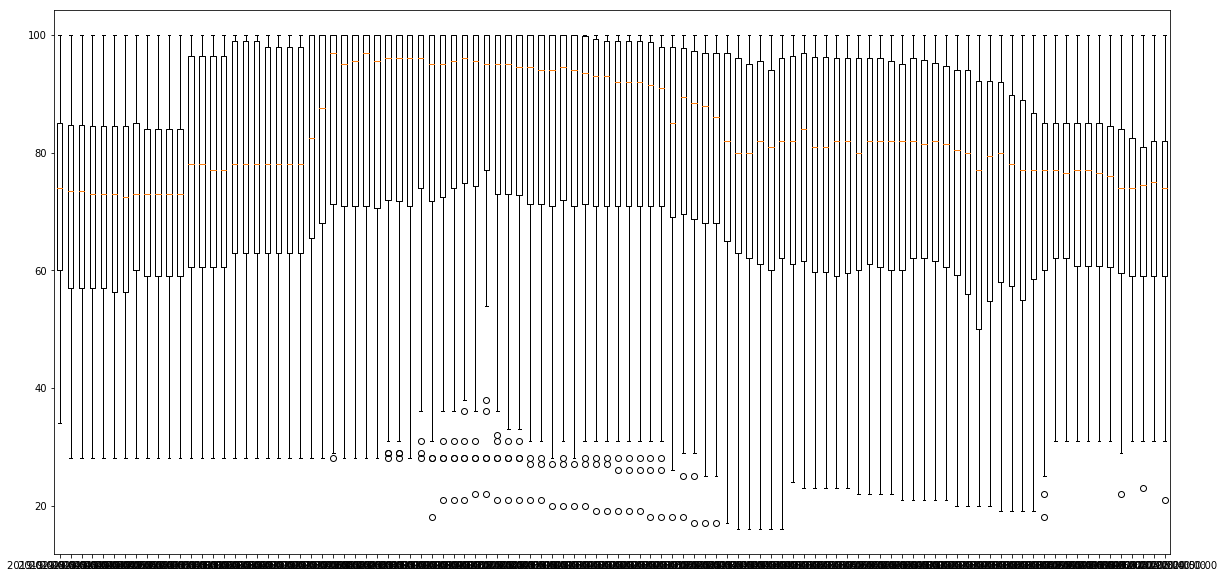

In [54]:
day_df = df[df['date_string'] == '2019-02-08']
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level']
# count_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
# ax = count_df.plot(figsize=(20,10), label = 'count')
key_list = []
item_list = []
# ax1 = ax.twinx()
fig, ax = plt.subplots(figsize=(20, 10))
counter = 0
for key, item in freq_df:
    key_list.append(key)
    item_list.append(freq_df.get_group(key))
#     ax1.boxplot(freq_df.get_group(key), notch=0, sym='+', vert=1, whis=1.5)
    counter +=1
ax.boxplot(item_list)
ax.set_xticklabels(key_list)
print(counter)

# day_df.boxplot('battery_level')

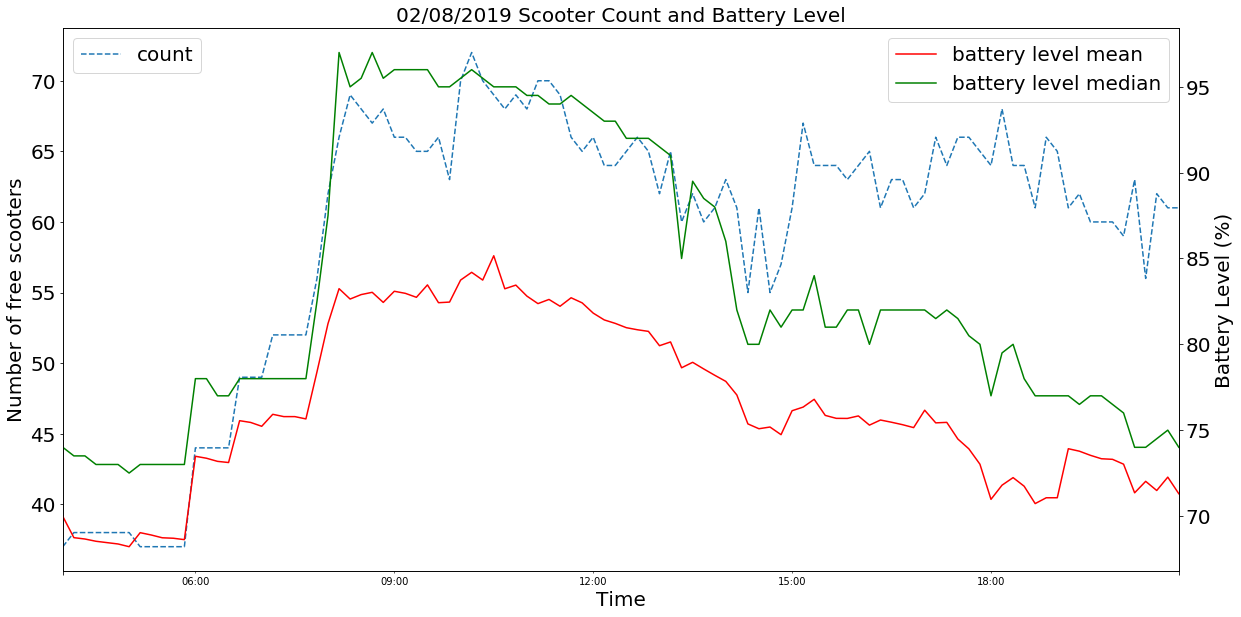

In [88]:
# Returns the large plot of battery and count for the powerpoint
day_df = df[df['date_string'] == '2019-02-08']
fontsize = '20'
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
ax = freq_df.plot(figsize=(20,10), label = 'count', ls='dashed')
ax1 = ax.twinx()
ax.set_title("02/08/2019 Scooter Count and Battery Level", fontsize = fontsize)
ax.set_xlabel("Time", fontsize = fontsize)
ax.legend(loc = 2, fontsize = fontsize)
ax.set_ylabel("Number of free scooters", fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
ax1.set_ylabel("Battery Level (%)", fontsize = fontsize)
ax1.tick_params(axis = 'both', labelsize = fontsize)
bat_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].mean()
bat_df_q1 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.25)
bat_df_q2 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].median()
bat_df_q3 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.75)
bat_df.plot(figsize=(20,10), ax=ax1, color= 'red', label = 'battery level mean')
# bat_df_q1.plot(figsize = (20,10), ax=ax1, color= 'blue', label = 'battery level Quartile 1')
bat_df_q2.plot(figsize = (20,10), ax=ax1, color= 'green', label = 'battery level median')
# bat_df_q3.plot(figsize = (20,10), ax=ax1, color= 'purple', label = 'battery level Quartile 3')
# ax1.set_ylim(bottom=0)
# ax.set_ylim(bottom=0)

ax1.legend(fontsize = fontsize)

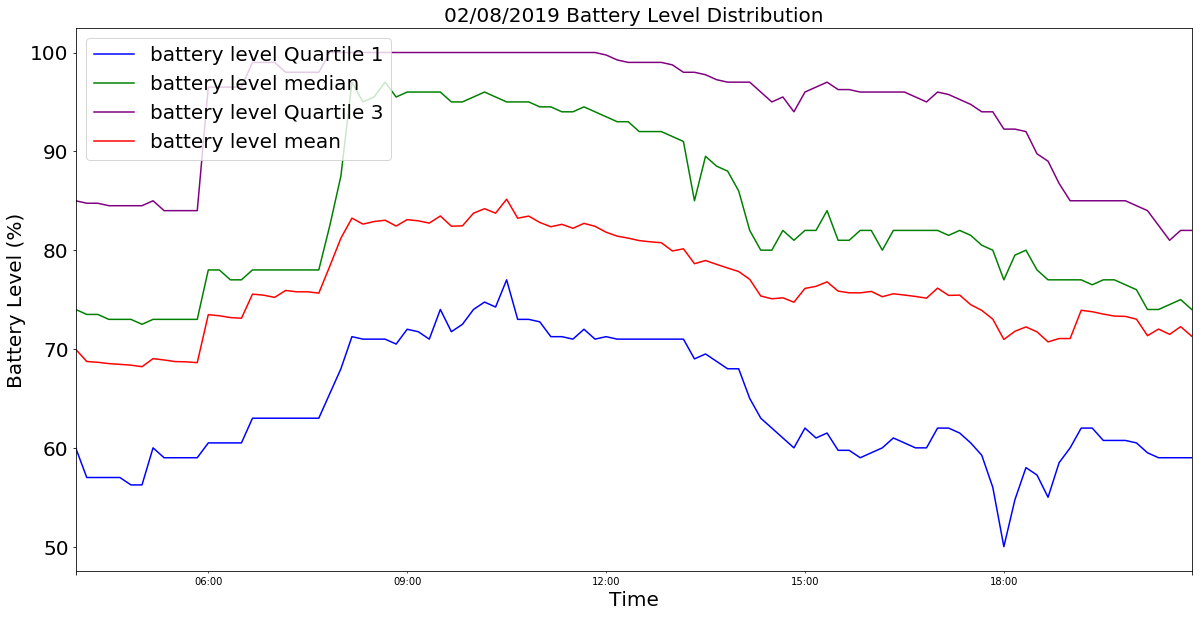

In [94]:
# Returns the large plot of battery and count for the powerpoint
day_df = df[df['date_string'] == '2019-02-08']
fontsize = '20'
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
# ax = freq_df.plot(figsize=(20,10), label = 'count', ls='dashed')
# ax1 = ax.twinx()

bat_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].mean()
bat_df_q1 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.25)
bat_df_q2 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].median()
bat_df_q3 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.75)
bat_df.plot(figsize=(20,10), ax=ax, color= 'red', label = 'battery level mean')
ax = bat_df_q1.plot(figsize = (20,10), color= 'blue', label = 'battery level Quartile 1')
bat_df_q2.plot(figsize = (20,10), ax=ax, color= 'green', label = 'battery level median')
bat_df_q3.plot(figsize = (20,10), ax=ax, color= 'purple', label = 'battery level Quartile 3')
bat_df.plot(figsize=(20,10), ax=ax, color= 'red', label = 'battery level mean')
ax.set_title("02/08/2019 Battery Level Distribution", fontsize = fontsize)
ax.set_xlabel("Time", fontsize = fontsize)
ax.legend(loc = 2, fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
ax.set_ylabel("Battery Level (%)", fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
# ax1.set_ylim(bottom=0)

# ax.set_ylim(bottom=0)

ax1.legend(fontsize = fontsize)